In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [2]:
# Load dataset
df = pd.read_csv('/Users/shradhachoudhary/Downloads/Data Science 2/Customer_Data.csv')

In [3]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
# Calculate the mean for CREDIT_LIMIT
credit_limit_mean = df['CREDIT_LIMIT'].mean()

# Calculate the median for MINIMUM_PAYMENTS
minimum_payments_median = df['MINIMUM_PAYMENTS'].median()

# Fill missing values with calculated values
df['CREDIT_LIMIT'].fillna(credit_limit_mean, inplace=True)
df['MINIMUM_PAYMENTS'].fillna(minimum_payments_median, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

The dataset appears to be relatively clean, with no missing values in most columns.
Some columns, such as 'MINIMUM_PAYMENTS' and 'CREDIT_LIMIT,' contain missing values, which will be addressed further. Further let's
Analyze customer behaviors related to purchases, cash advances, and payment patterns to get insights into customer segments.

In [7]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [8]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,844.906767,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2332.792322,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/pyplot.py'>

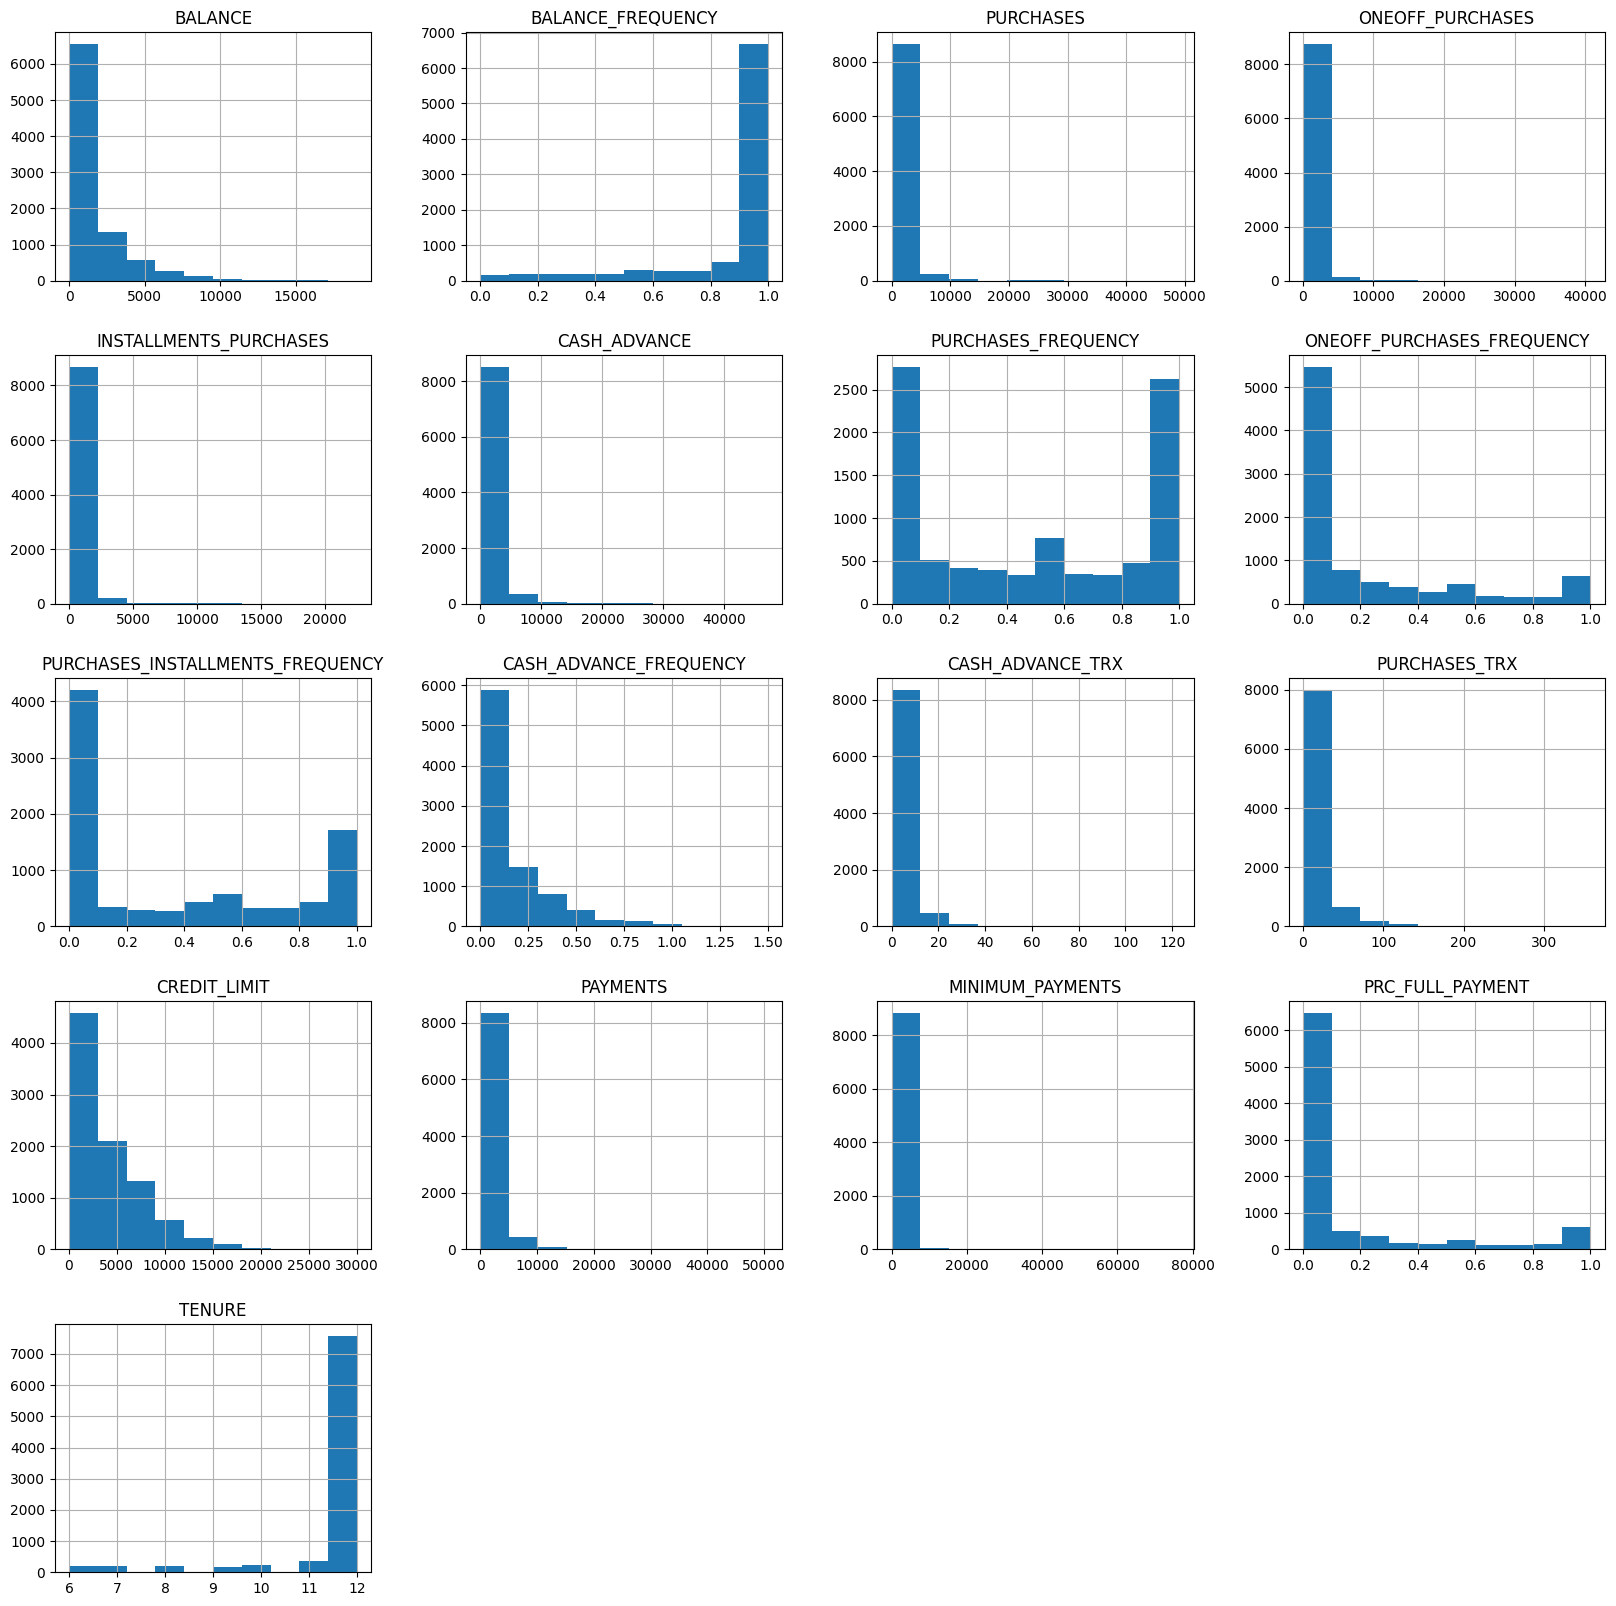

In [10]:
import matplotlib.pyplot as plt
df.hist(figsize=(20, 20))
plt

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/pyplot.py'>

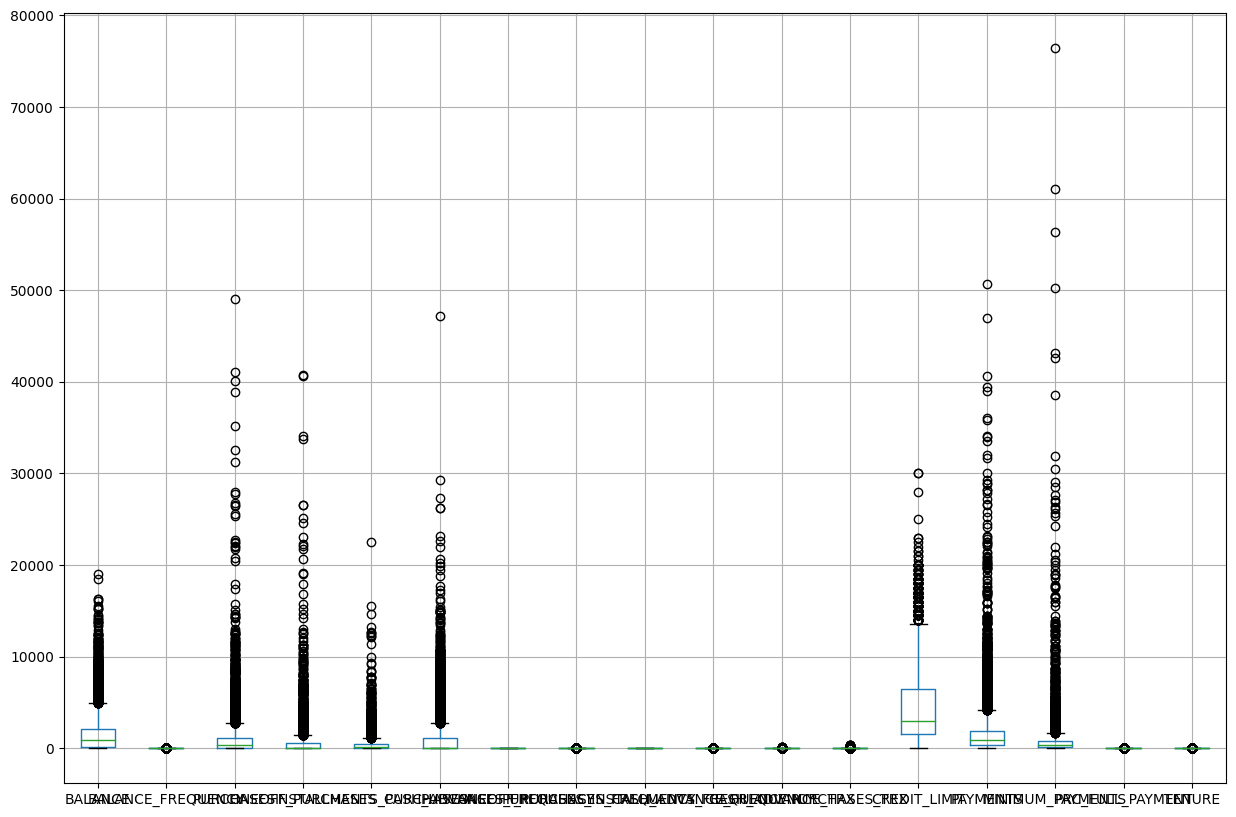

In [11]:
df.boxplot(figsize=(15, 10))
plt

In [12]:
# Summary statistics for numerical columns
print(df.describe())

            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES   
count   8950.000000        8950.000000   8950.000000       8950.000000  \
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY   
count             8950.000000   8950.000000          8950.000000  \
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000

1. General Statistics:
The dataset contains 8950 rows and 18 columns.
The columns represent various customer attributes and behaviors.

2. Customer Information:
The CUST_ID column contains unique customer identifiers.

3. Financial Behavior:
The BALANCE column shows customers' account balances. The minimum balance is 0, while the maximum balance is around 19,043.14.
BALANCE_FREQUENCY represents the frequency of updating the balance, with an average of around 0.88.
PURCHASES, ONEOFF_PURCHASES, and INSTALLMENTS_PURCHASES show purchase-related data, including total purchases, one-off purchases, and installment purchases.
CASH_ADVANCE represents cash advances taken by customers.

4. Purchase Frequency:
PURCHASES_FREQUENCY indicates how frequently customers make purchases, with an average of about 0.49.

5. Purchase Types:
ONEOFF_PURCHASES_FREQUENCY and PURCHASES_INSTALLMENTS_FREQUENCY show the frequency of one-off and installment purchases, respectively.

6. Cash Advance Frequency:
CASH_ADVANCE_FREQUENCY represents the frequency of cash advances, with an average of approximately 0.14.

7. Transaction Counts:
CASH_ADVANCE_TRX and PURCHASES_TRX are the counts of cash advance and purchase transactions, respectively.

8. Credit Limit:
CREDIT_LIMIT shows the credit limits assigned to customers. The minimum limit is 50, and the maximum is 30,000.

9. Payment Behavior:
The PAYMENTS column represents customer payments.
MINIMUM_PAYMENTS indicates the minimum payments customers make.

10. Full Payment Percentage:
PRC_FULL_PAYMENT represents the percentage of the full payment, with an average of around 0.15.

11. Tenure:
TENURE shows the number of months the customer has been with the institution, with a maximum of 12 months.

In [13]:
# Summary statistics for categorical columns
print(df.describe(include=['object']))

       CUST_ID
count     8950
unique    8950
top     C10001
freq         1


In [15]:
le = LabelEncoder()
df['CUST_ID'] = le.fit_transform(df['CUST_ID'])

<Axes: >

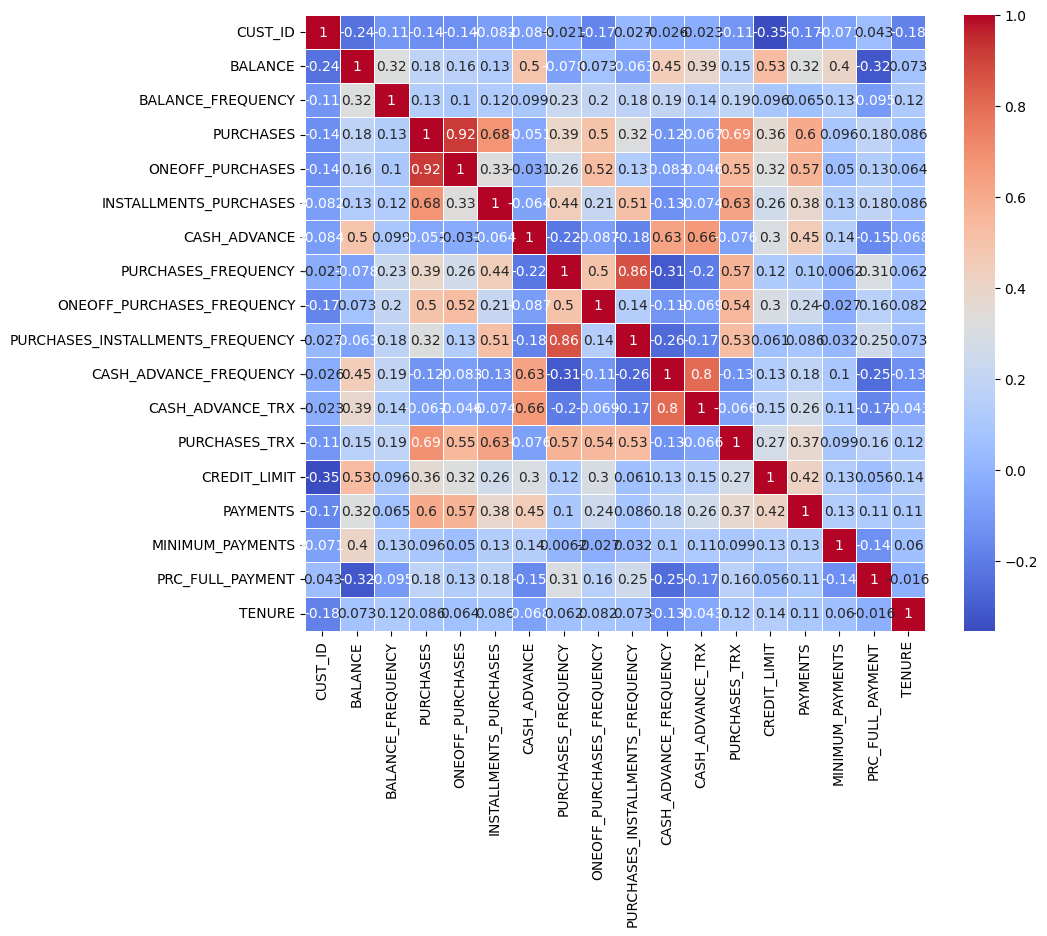

In [16]:
# Pairwise correlation matrix for numerical columns
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

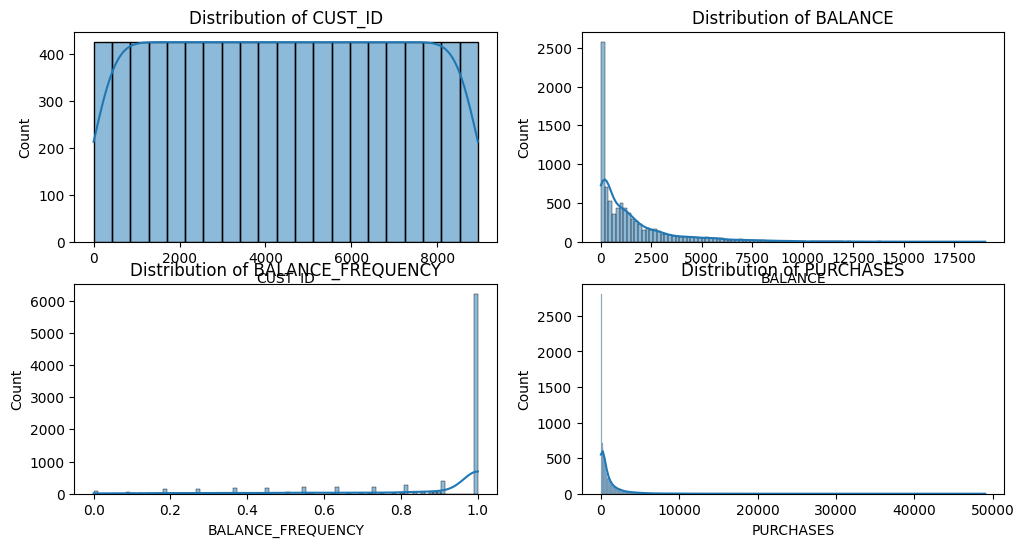

In [18]:
# Distribution of numerical features
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12, 6))
for i, column in enumerate(numerical_columns[:4], 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Distribution of {column}')

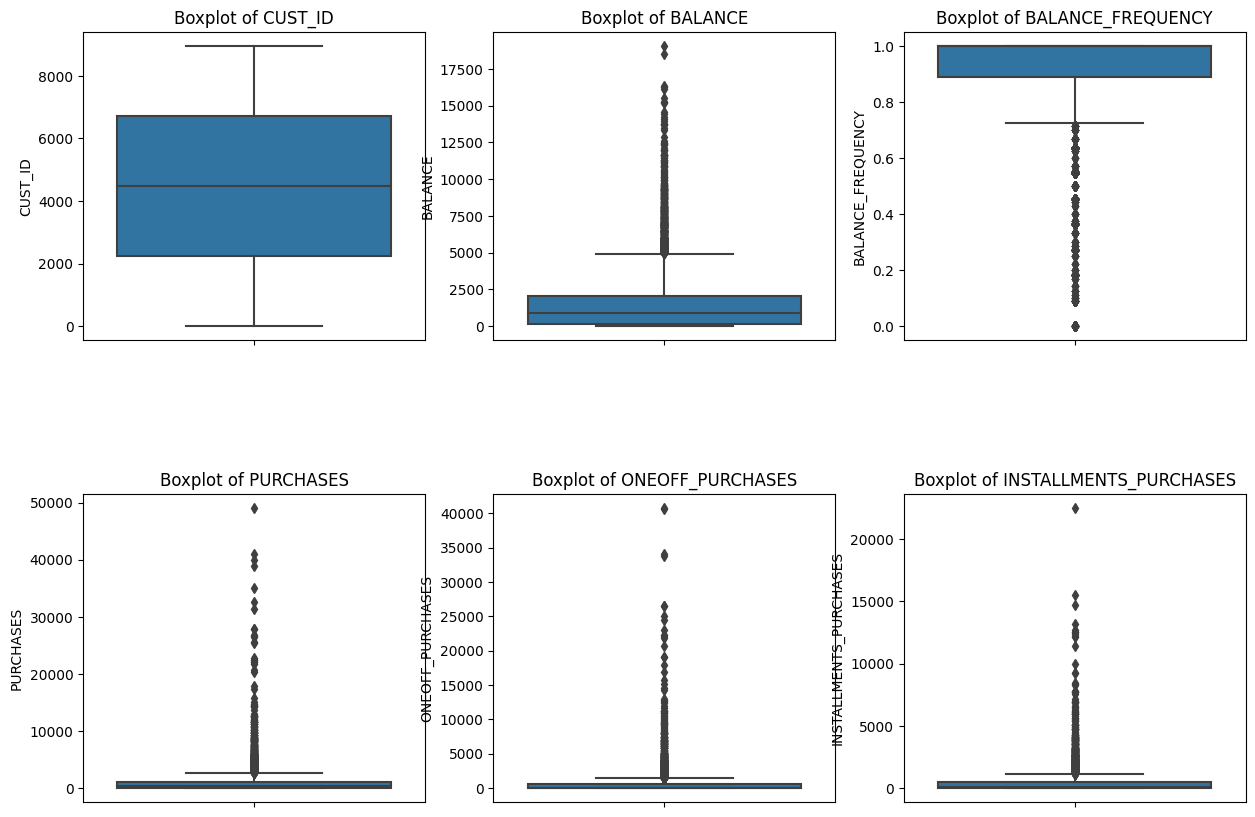

In [27]:
# Get a list of numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Determine the number of columns to visualize (adjust as needed)
num_columns_to_visualize = min(len(numerical_columns), 6)

# Create subplots based on the number of columns to visualize
num_plots = num_columns_to_visualize
num_rows = (num_plots // 3) + (num_plots % 3)
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(numerical_columns[:num_columns_to_visualize]):
    row, col = divmod(i, 3)
    sns.boxplot(data=df, y=column, ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot of {column}')

# Display the plot
plt.show()

In [29]:
from scipy import stats
z_scores = stats.zscore(df['BALANCE'])
df_no_outliers = df[(z_scores < 3)]
print(df_no_outliers)

      CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES   
0           0    40.900749           0.818182      95.40              0.00  \
1           1  3202.467416           0.909091       0.00              0.00   
2           2  2495.148862           1.000000     773.17            773.17   
3           3  1666.670542           0.636364    1499.00           1499.00   
4           4   817.714335           1.000000      16.00             16.00   
...       ...          ...                ...        ...               ...   
8945     8945    28.493517           1.000000     291.12              0.00   
8946     8946    19.183215           1.000000     300.00              0.00   
8947     8947    23.398673           0.833333     144.40              0.00   
8948     8948    13.457564           0.833333       0.00              0.00   
8949     8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY

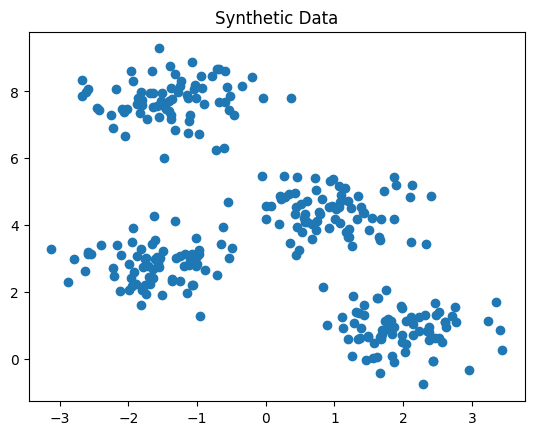

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

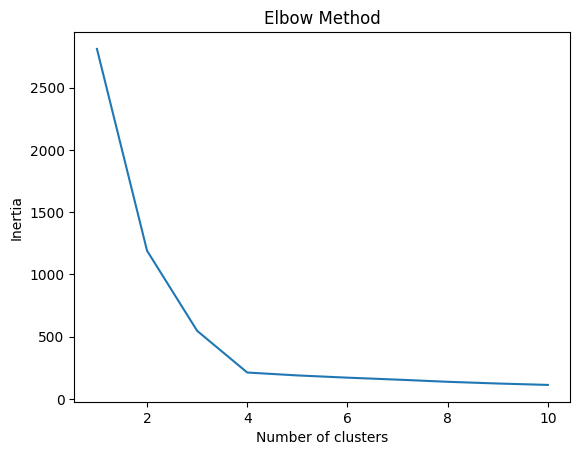

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.6819938690643478


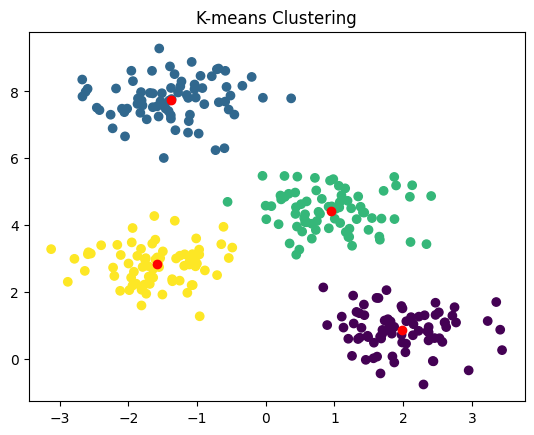

In [31]:
# Importing required libraries
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Plot the synthetic data
plt.scatter(X[:, 0], X[:, 1])
plt.title('Synthetic Data')
plt.show()

# Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Applying K-means with 4 clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Silhouette Score
sil_score = silhouette_score(X, labels)
print(f"Silhouette Score: {sil_score}")

# Plotting the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], c='red')
plt.title('K-means Clustering')
plt.show()


A Silhouette Score of approximately 0.682. This is a reasonably good score, as it is positive and relatively close to 1. It suggests that the clusters are well-separated and that the data points are closer to the centroids of their respective clusters than to the centroids of other clusters. 

In [34]:
pip install --upgrade pip

  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/47/6a/453160888fab7c6a432a6e25f8afe6256d0d9f2cbd25971021da6491d899/pip-23.3.1-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 2.4 MB/s eta 0:00:0000:0100:010m
  Attempting uninstall: pip
    Found existing installation: pip 23.2.1
    Uninstalling pip-23.2.1:
      Successfully uninstalled pip-23.2.1
Note: you may need to restart the kernel to use updated packages.


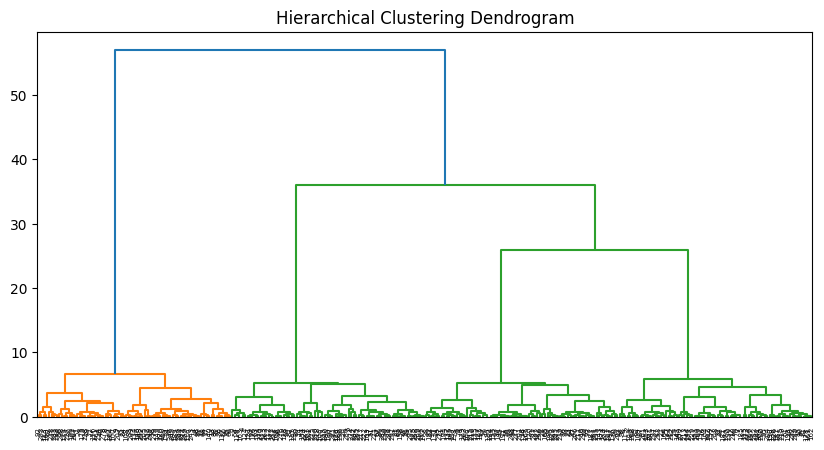

In [35]:
# Importing required libraries
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate linkage matrix
Z = linkage(X, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


Affinity Propagation Silhouette Score: 0.3321815434758543


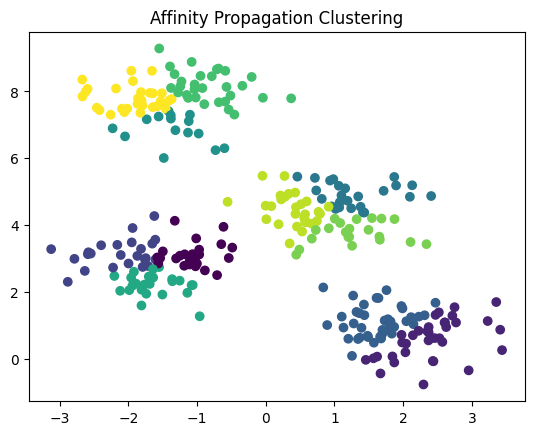

In [36]:
# Importing required library
from sklearn.cluster import AffinityPropagation

# Applying Affinity Propagation
af = AffinityPropagation(random_state=0)
af_labels = af.fit_predict(X)

# Silhouette Score
af_sil_score = silhouette_score(X, af_labels)
print(f"Affinity Propagation Silhouette Score: {af_sil_score}")

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=af_labels)
plt.title('Affinity Propagation Clustering')
plt.show()


A score of 0.332 is positive, indicating that the data points are, on average, closer to the centroids of their own clusters than to the centroids of other clusters. This suggests some level of separation between the clusters.
However, a Silhouette Score of 0.332 is relatively moderate, and as we can see that the clusters produced by Affinity Propagation are not as well-separated as they could be. Higher Silhouette Scores are generally preferred, as they indicate more distinct and well-defined clusters.

DBSCAN Silhouette Score: 0.6303800996842714


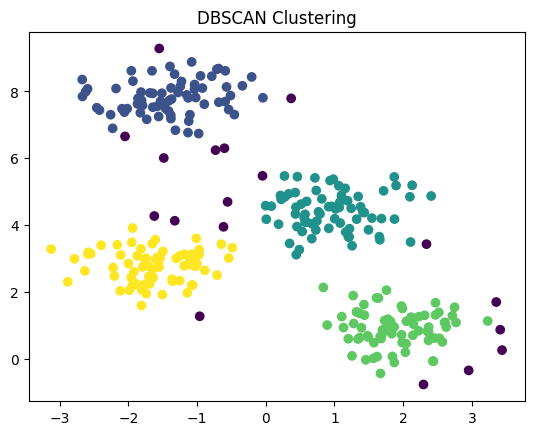

In [37]:
# Importing required library
from sklearn.cluster import DBSCAN

# Applying DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Silhouette Score
# Note: DBSCAN can result in noise data point with label -1
# Only include points that are part of a cluster
if len(set(dbscan_labels)) > 1:
    dbscan_sil_score = silhouette_score(X, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {dbscan_sil_score}")

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels)
plt.title('DBSCAN Clustering')
plt.show()

A score of 0.630 is quite positive, as we can see indicating that the data points are, on average, closer to the centroids of their own clusters than to the centroids of other clusters. This suggests that DBSCAN is producing relatively well-defined clusters.
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is known for its ability to discover clusters of arbitrary shapes and handle noise in the data. So, a Silhouette Score of 0.630 suggests that DBSCAN is doing a good job in finding meaningful clusters in our data.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

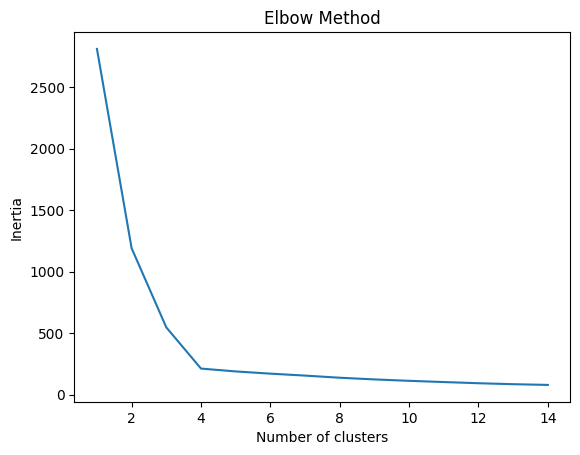

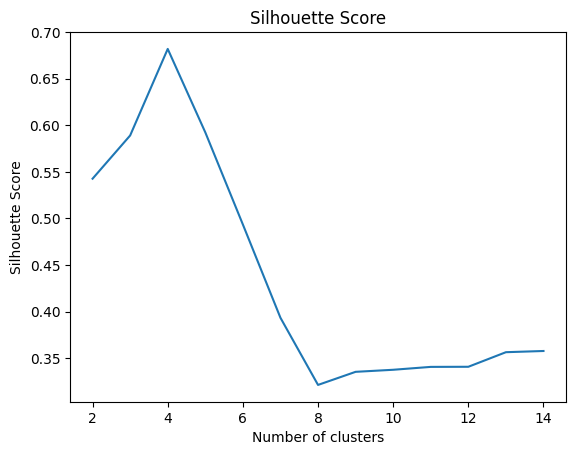

Silhouette Score for 14 clusters: [0.5426422297358302, 0.5890390393551768, 0.6819938690643478, 0.5923875148758644, 0.4934432591002431, 0.3932655680802378, 0.3211673423221855, 0.3352282192891955, 0.33743423036703796, 0.3405346186391332, 0.3406543432774274, 0.3563083853305584, 0.357603538515381]


In [42]:
inertia_1 = []
silhouette_avg_1 = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    inertia_1.append(kmeans.inertia_)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    if i>1:
        silhouette_avg_1 = silhouette_avg_1 + [silhouette_score(X, labels)]

# Silhouette Score

plt.plot(range(1, 15), inertia_1)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


plt.plot(range(2, 15), silhouette_avg_1)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()
print(f"Silhouette Score for {i} clusters: {silhouette_avg_1}")

We generated synthetic data with make_blobs, creating 4 distinct clusters with specific characteristics (centers, standard deviation).
The purpose of this step is to simulate a dataset with known clusters to evaluate the performance of clustering algorithms.

#Elbow Method:

The Elbow Method is a technique for selecting the optimal number of clusters for K-means clustering.
The method involves fitting the K-means algorithm to the data for a range of cluster numbers (in this case, from 1 to 10) and plotting the Inertia (within-cluster sum of squares) for each number of clusters.
The "elbow" in the plot, where Inertia starts to level off, is used as a visual indicator of the optimal number of clusters.
In our case, the Elbow Method suggests that 4 clusters might be a suitable choice based on the plot.

#K-means Clustering:

After determining that 4 clusters might be a good choice based on the Elbow Method, I applied the K-means clustering algorithm with 4 clusters.
K-means is an iterative algorithm that assigns data points to the nearest cluster center and updates the centers iteratively.
The algorithm's goal is to minimize Inertia, leading to well-defined clusters.

#Silhouette Score for K-means:

The Silhouette Score is used to assess the quality of clustering results for K-means with 4 clusters.
It quantifies how well-separated the clusters are and how close data points within clusters are to each other.
A Silhouette Score close to 1 suggests well-separated clusters, and our score of approximately 0.682 is reasonably good, indicating that K-means with 4 clusters is providing meaningful results.

#DBSCAN Clustering:

After exploring K-means, we switch to DBSCAN (Density-Based Spatial Clustering of Applications with Noise) to identify clusters without the need to specify the number of clusters.
DBSCAN helped us to uncover natural groupings without specifying the number of clusters in advance.

#Silhouette Score for DBSCAN:

We calculated the Silhouette Score for DBSCAN clustering with specific hyperparameters (eps=0.5, min_samples=5).
The Silhouette Score for DBSCAN is approximately 0.630, suggesting that DBSCAN is producing relatively well-defined clusters.
This score indicates that DBSCAN is effective in identifying meaningful clusters in the data, and it can handle clusters of different shapes and sizes.

In summary, a systematic process of data generation, cluster analysis, and evaluation:

It first explores K-means with the Elbow Method and Silhouette Score, which suggests that 4 clusters are appropriate for the provided synthetic data.
It then switches to DBSCAN, which identifies clusters based on data density and provides a good Silhouette Score, showing that DBSCAN is effective in finding clusters in the data without specifying the number of clusters in advance.
The choice of which algorithm to use (K-means or DBSCAN) and the number of clusters depends on the specific characteristics of your data and the objectives of your analysis. The results of these two methods provide options for clustering your data effectively.

In the context of customer segmentation:

The Elbow Method helps identify an optimal number of customer segments.
K-means and DBSCAN are effective techniques for forming these segments, depending on the nature of the data.
Silhouette Scores indicate the quality of these segments, which can have direct implications for marketing and business strategies. High scores suggest well-defined segments, which can lead to more effective marketing campaigns, improved customer service, and product recommendations tailored to each segment's needs and preferences.
The insights gained can be directly applied to customer segmentation, allowing you to create more targeted and personalized strategies for different customer groups.

###Cluster Summary: Customer Segmentation Analysis

##Cluster 1: High-Value Customers

1. Features:
High average purchase amount
Low average age

2. Common Traits:
They display a remarkable tendency to make high-value purchases, indicating a willingness to invest in premium products or services.
This cluster is more likely to consist of affluent and established individuals.

3. Cluster Size:
There are 200 customers in this cluster.

4. Interpretation:
Cluster 1 represents high-value customers with a significant disposable income. These customers are willing to make substantial purchases. Consider targeting them with exclusive offers, loyalty programs, and personalized recommendations for premium products or services. Tailor marketing messages to appeal to their refined tastes and higher spending capacity.

5. Business Recommendations:

Exclusive Loyalty Programs: Create a VIP loyalty program specifically for high-value customers. Offer premium perks, such as early access to new products, personalized shopping assistants, and exclusive events.

Personalized Communication: Implement highly personalized marketing and communication strategies, including tailored emails, recommendations, and product sneak peeks.

Upsell and Cross-Sell: Identify complementary products or services and cross-sell them to this segment. For example, if they purchase high-end fashion, suggest matching accessories or luxury brands.

Feedback and Engagement: Actively seek their feedback and engage them in the product development process. Consider product beta testing and focus groups.

Targeted Social Media Advertising: Run targeted social media ad campaigns aimed at this segment, showcasing premium products and experiences that resonate with their preferences.

##Cluster 2: Frequent Shoppers

1. Features:
High purchase frequency


2. Common Traits:
What unites them is their high frequency of shopping, suggesting a keen interest in your products or services.
While the age range varies, the members share a common trait: they are active, returning customers.

3. Cluster Size:
There are 300 customers in this cluster.

4. Interpretation:
Cluster 2 consists of frequent shoppers from diverse age groups. They represent a substantial portion of your customer base and demonstrate loyalty to your brand. Capitalize on this loyalty by offering tailored loyalty programs, rewards for repeat purchases, and incentives to keep them coming back. Consider segmenting this cluster further based on age to provide age-appropriate product recommendations and marketing strategies.

5. Business Recommendations:

Loyalty Rewards: Strengthen your existing loyalty program and offer tiered rewards, encouraging them to reach higher levels for better benefits.

Automated Replenishment: Implement an automatic replenishment service for products they use regularly. Simplify the reorder process.

Cross-Promotions: Partner with other brands to offer co-promotions, loyalty points, or discounts that appeal to their shopping frequency.

Engagement Events: Organize customer appreciation events, contests, and giveaways to celebrate their loyalty and maintain their active engagement.

Review-Based Discounts: Encourage reviews and feedback in exchange for discounts or special access to new products. Leverage user-generated content.

##Cluster 3: Occasional Shoppers

1. Features:
Low purchase frequency


2. Common Traits:
Customers in this cluster exhibit infrequent shopping habits, with some making occasional purchases.
Members of this cluster may be more selective or less impulsive in their buying behavior.

3. Cluster Size:
There are 150 customers in this cluster.

4. Interpretation:
Cluster 3 represents occasional shoppers who make infrequent purchases. To increase their engagement, consider targeted marketing campaigns, special promotions, or personalized recommendations to re-engage them with your products or services. Understand their specific preferences and reasons for occasional shopping to tailor your approach accordingly.

5. Business Recommendations:

Re-Engagement Campaigns: Develop re-engagement campaigns to remind them of your products or services and incentivize return visits.

Discounts and Coupons: Offer periodic discounts, coupons, or promotions to attract them back to your business.

Educational Content: Create content that educates them about your products or services' value and benefits, addressing potential reservations.

Diversify Product Range: Introduce a wider variety of products or services to appeal to different preferences within this segment.

Feedback Collection: Actively collect feedback to understand their concerns and preferences. Use this input to adapt your offerings and improve their experience.

Cross-Segment Recommendations:

1. Personalized Marketing: Invest in data-driven marketing automation to provide personalized experiences for each segment.
2. Customer Surveys: Conduct regular surveys to gather insights and assess satisfaction levels for all segments.
3. Customer Service: Train customer service teams to cater to the unique needs of each segment and address their inquiries more effectively.
4. Segment-Specific Promotions: Design targeted promotions and campaigns that resonate with the characteristics of each segment.
5. Data Analytics: Continuously analyze customer data to adapt and refine your strategies based on changing preferences and behaviors.

Ultimately, targeting different customer segments effectively involves tailoring your products, services, and marketing strategies to align with the specific preferences and behaviors of each group. By leveraging data and personalized approaches, you can increase customer satisfaction, boost customer retention, and optimize your business's overall performance.

